In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, train_test_split
import time
from sklearn.externals import joblib
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

/home/veruska/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data_path = '../../data/output/normalized_data_X.csv'
y_path = '../../data/output/y.csv'

data = pd.read_csv(data_path)
y = pd.read_csv(y_path)
print(data.shape)
print(y.shape)
data.head()

(1432633, 420)
(1432633, 1)


,route,tripNum,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,gpsLat,gpsLon,...,alertTypeSB_ACCIDENT,alertTypeSB_CHIT_CHAT,alertTypeSB_HAZARD,alertTypeSB_JAM,alertTypeSB_NORMAL,alertTypeSB_POLICE,alertTypeSB_ROAD_CLOSED,jamBlockTypeSB_-,jamBlockTypeSB_NORMAL,jamBlockTypeSB_ROAD_CLOSED_EVENT
0,0.118068,0.066667,0.085019,0.264600,0.496150,0.057584,0.0,0.000000,0.266155,0.496047,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.118068,0.066667,0.085026,0.270218,0.501802,0.064231,0.0,0.000148,0.271812,0.501642,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.118068,0.066667,0.085033,0.273653,0.505296,0.068301,0.0,0.000000,0.275187,0.505192,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.118068,0.066667,0.085039,0.277433,0.509404,0.072900,0.0,0.000149,0.280622,0.510132,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.118068,0.066667,0.085053,0.280050,0.513166,0.077983,0.0,0.000155,0.281878,0.513178,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
# Making training and test data: 80% Training, 20% Test
random.seed(15) #to get always the same set
train_X, test_X, train_Y, test_Y = train_test_split(data, y, test_size=0.20, random_state=7)

In [4]:
def f1_cv(model, X_train, y_train):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring = "f1", cv = 5))
    return(rmse)

# function to plot the RMSE vs parameter value
def plot_f1_param(series, param_name):
    series.plot(title = "Validation Error vs " + param_name)
    plt.xlabel(param_name)
    plt.ylabel("F1")
    
# function to get the best RMSE and the best parameter value of the model
def best_f1_param(series):
    best_f1 = series.min()
    best_param = series.idxmin() 
    
    return(best_f1, best_param)

### AdaBoost

/home/veruska/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, wa

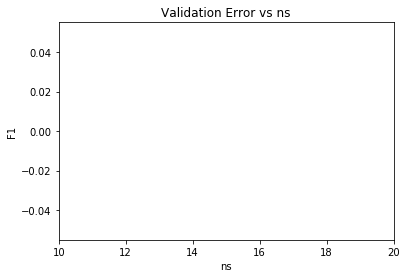

In [5]:
start = time.time()

ns = [10,20]#[50, 100, 150, 300, 500, 1000]
cv_estimators_f1 = [f1_cv(AdaBoostClassifier(n_estimators = n), train_X, train_Y).mean() 
            for n in ns]

series = pd.Series(cv_estimators_f1, index = ns)
plot_f1_param(series, "ns")
best_f1_knn, best_n_ada = best_f1_param(series)

In [6]:
print("best_n_ada: " + str(best_n_ada))

best_n_ada: 10


In [ ]:
model = AdaBoostClassifier(n_estimators=5000, base_estimator=RandomForestClassifier(n_estimators=100, 
                                                                                    min_samples_split=5,
                                                                                    max_features=0.8, n_jobs=-1),
                           learning_rate=0.01, random_state=0) #lr=1 n=5000, 0.14
model.fit(train_X, train_Y)

/home/veruska/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pred_array = model.predict(test_X)

In [ ]:
pred_array

In [ ]:
# Bus Bunching
accuracy = accuracy_score(test_Y, pred_array)
precision = precision_score(test_Y, pred_array)
recall = recall_score(test_Y, pred_array)
f_measure = f1_score(test_Y, pred_array)

In [ ]:
#todos
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

In [ ]:
#5p
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure)) #f1 78%, todos: 9% (dt)

In [10]:
#5p
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure)) #f1 72%, todos: 9% (rf)

Accuracy: 0.9574300636760392
Precision: 0.9558472553699284
Recall: 0.5894039735099338
F-measure: 0.7291761492944926
